In [50]:
# Import seaborn & matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Import setup and seaborn_helpers
from setup.setup import *

In [3]:
# Load cdl dataframe
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\2024.04.10 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,27290,2024-04-20,Saturday,Skyz,New York Subliners,4,Vista,Hardpoint,32,27,...,0,L,NYSL,Subliners,Seattle Surge,SEA,250,444,-56,0
4204,27290,2024-04-20,Saturday,04,Seattle Surge,4,Vista,Hardpoint,31,34,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0
4205,27290,2024-04-20,Saturday,Abuzah,Seattle Surge,4,Vista,Hardpoint,31,24,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0
4206,27290,2024-04-20,Saturday,Breszy,Seattle Surge,4,Vista,Hardpoint,32,29,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0


In [4]:
# Build series summaries
series_summaries = build_series_summaries(cdlDF)
series_summaries

,match_id,team,team_abbr,map_wins,map_losses,series_score_diff,match_date,opp
0,27193,Atlanta FaZe,ATL,3,2,1,2023-12-08,BOS
1,27193,Boston Breach,BOS,2,3,-1,2023-12-08,ATL
2,27194,Los Angeles Thieves,LAT,1,3,-2,2023-12-08,SEA
3,27194,Seattle Surge,SEA,3,1,2,2023-12-08,LAT
4,27195,New York Subliners,NYSL,3,2,1,2023-12-08,TX
...,...,...,...,...,...,...,...,...
263,27288,Miami Heretics,MIA,2,3,-1,2024-04-20,LAT
264,27289,Las Vegas Legion,LV,0,3,-3,2024-04-20,TX
265,27289,OpTic Texas,TX,3,0,3,2024-04-20,LV
266,27290,New York Subliners,NYSL,1,3,-2,2024-04-20,SEA


In [5]:
# Filter maps
cdlDF = filter_maps(cdlDF)
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,27290,2024-04-20,Saturday,Skyz,New York Subliners,4,Vista,Hardpoint,32,27,...,0,L,NYSL,Subliners,Seattle Surge,SEA,250,444,-56,0
3100,27290,2024-04-20,Saturday,04,Seattle Surge,4,Vista,Hardpoint,31,34,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0
3101,27290,2024-04-20,Saturday,Abuzah,Seattle Surge,4,Vista,Hardpoint,31,24,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0
3102,27290,2024-04-20,Saturday,Breszy,Seattle Surge,4,Vista,Hardpoint,32,29,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0


In [149]:
# Filter cdlDF for player analysis dataframe
queried_df = cdlDF[
    (cdlDF["player"] == "Attach") &
    (cdlDF["gamemode"] == "Search & Destroy")
]

queried_df

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
80,27197,2023-12-09,Saturday,Attach,Las Vegas Legion,2,Invasion,Search & Destroy,6,2,...,1,W,LV,Legion,Minnesota ROKKR,MIN,1,7,5,0
156,27200,2023-12-10,Sunday,Attach,Las Vegas Legion,5,Invasion,Search & Destroy,7,5,...,0,L,LV,Legion,Carolina Royal Ravens,CAR,6,11,-1,0
240,27204,2023-12-15,Friday,Attach,Las Vegas Legion,2,Invasion,Search & Destroy,11,7,...,0,L,LV,Legion,Miami Heretics,MIA,6,11,-1,0
528,27220,2024-01-13,Saturday,Attach,Las Vegas Legion,5,Invasion,Search & Destroy,3,6,...,0,L,LV,Legion,OpTic Texas,TX,6,7,-5,0
904,35643,2024-01-26,Friday,Attach,Las Vegas Legion,2,Karachi,Search & Destroy,8,5,...,1,W,LV,Legion,Miami Heretics,MIA,4,10,2,0
960,35645,2024-01-26,Friday,Attach,Las Vegas Legion,2,Invasion,Search & Destroy,10,3,...,0,W,LV,Legion,Los Angeles Guerrillas,LAG,4,10,2,0
1312,27240,2024-02-18,Sunday,Attach,Las Vegas Legion,2,Invasion,Search & Destroy,10,7,...,1,L,LV,Legion,Los Angeles Guerrillas,LAG,6,8,-4,0
1440,27245,2024-02-23,Friday,Attach,Las Vegas Legion,2,Karachi,Search & Destroy,5,9,...,1,L,LV,Legion,Miami Heretics,MIA,6,11,-1,0
1464,27245,2024-02-23,Friday,Attach,Las Vegas Legion,5,Invasion,Search & Destroy,9,4,...,1,W,LV,Legion,Miami Heretics,MIA,3,9,3,0
1480,27246,2024-02-24,Saturday,Attach,Las Vegas Legion,2,Rio,Search & Destroy,4,3,...,0,W,LV,Legion,Toronto Ultra,TOR,0,6,6,0


In [21]:
# Set seaborn theme
sns.set_theme(style = "darkgrid")

Text(0, 0.5, 'Kills')

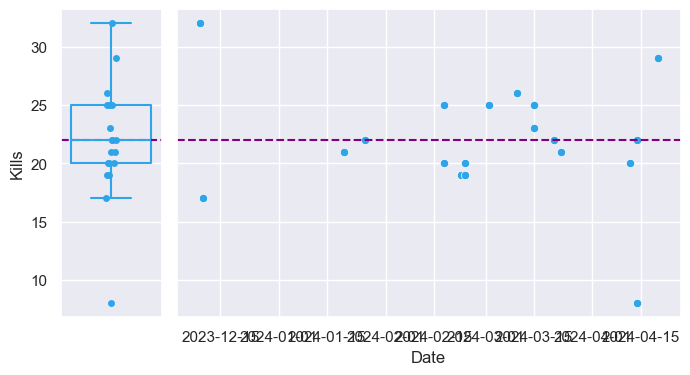

In [142]:
# Player Kills vs Time

# Create figure with gridspec
f, axs = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = dict(width_ratios=[0.4, 2], wspace = 0.05), sharey = True)

# Boxplot
sns.boxplot(queried_df, y =  "kills", fill = False, ax=axs[0], color = "#2fa4e7", showfliers = False)
sns.stripplot(queried_df, y = "kills", jitter = 0.05, ax=axs[0], color = "#2fa4e7")
axs[0].axhline(y = 22, color = "purple", linestyle = '--')

# Scatterplot
sns.scatterplot(queried_df, x = "match_date", y = "kills", ax=axs[1], color = "#2fa4e7")
axs[1].axhline(y = 22, color = "purple", linestyle = '--')

# If necessary, scale y-axis due to lack of entries
kills = queried_df["kills"].to_list()
kills.append(22)
kills
min_y = min(kills)
max_y = max(kills)
if min_y == max_y:
    y_axis_ticks = range(min_y - 2, max_y + 3)
elif max_y - min_y <= 5:
    y_axis_ticks = range(min_y, max_y + 1)
    plt.yticks(y_axis_ticks)

# Label current line from PrizePicks
bbox = {'facecolor': 'purple', 'alpha': 0.5, 'pad': 0.4, 'boxstyle': 'round'}
axs[1].annotate("Line: " + str(22), xy = (0, 22 + 1), bbox = bbox)

# Styling
axs[1].set_xlabel("Date")
axs[0].set_ylabel("Kills")

Text(0, 0.5, 'Kills')

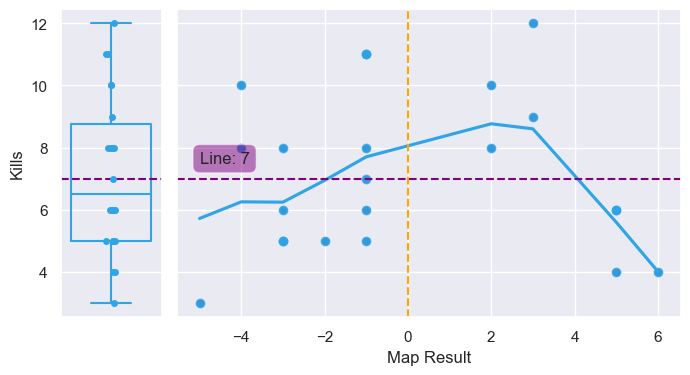

In [154]:
# Player Kills vs Score Diff

# Create figure with gridspec
f, axs = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = dict(width_ratios=[0.4, 2], wspace = 0.05), sharey = True)

# Boxplot
sns.boxplot(queried_df, y =  "kills", fill = False, ax=axs[0], color = "#2fa4e7", showfliers = False)
sns.stripplot(queried_df, y = "kills", jitter = 0.05, ax=axs[0], color = "#2fa4e7")
axs[0].axhline(y = 7, color = "purple", linestyle = '--')

# Scatterplot
sns.scatterplot(queried_df, x = "score_diff", y = "kills", ax=axs[1])
sns.regplot(queried_df, x = "score_diff", y = "kills", lowess = True, color = "#2fa4e7")
axs[1].axhline(y = 7, color = "purple", linestyle = '--')
axs[1].axvline(x = 0, color = "orange", linestyle = '--')

# If necessary, scale y-axis due to lack of entries
kills = queried_df["kills"].to_list()
kills.append(22)
kills
min_y = min(kills)
max_y = max(kills)
if min_y == max_y:
    y_axis_ticks = range(min_y - 2, max_y + 3)
elif max_y - min_y <= 5:
    y_axis_ticks = range(min_y, max_y + 1)
    plt.yticks(y_axis_ticks)

# Label current line from PrizePicks
bbox = {'facecolor': 'purple', 'alpha': 0.5, 'pad': 0.4, 'boxstyle': 'round'}
min_score_diff = min(queried_df["score_diff"])
axs[1].annotate("Line: " + str(7), xy = (min_score_diff, 7 + 0.5), bbox = bbox)

# Styling
axs[1].set_xlabel("Map Result")
axs[0].set_ylabel("Kills")

In [83]:
# Filter series summaries for team series analysis
queried_df = series_summaries[series_summaries["team"] == "OpTic Texas"]
queried_df

,match_id,team,team_abbr,map_wins,map_losses,series_score_diff,match_date,opp
5,27195,OpTic Texas,TX,2,3,-1,2023-12-08,NYSL
21,27203,OpTic Texas,TX,3,1,2,2023-12-10,MIN
26,27206,OpTic Texas,TX,3,1,2,2023-12-15,SEA
37,27211,OpTic Texas,TX,3,0,3,2023-12-17,CAR
55,27220,OpTic Texas,TX,3,2,1,2024-01-13,LV
67,27226,OpTic Texas,TX,0,3,-3,2024-01-19,MIA
83,27234,OpTic Texas,TX,0,3,-3,2024-01-21,ATL
87,35634,OpTic Texas,TX,3,0,3,2024-01-25,MIA
105,35647,OpTic Texas,TX,2,3,-1,2024-01-27,ATL
108,35649,OpTic Texas,TX,3,1,2,2024-01-27,SEA


Text(0.5, 0, 'Series Result')

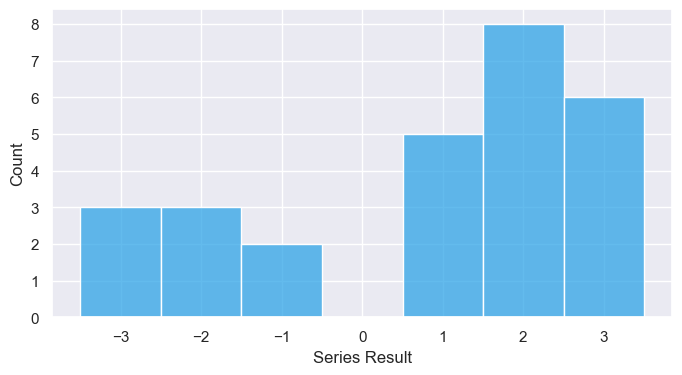

In [11]:
# Team Series Score Diffs

# Create figure
fig, ax = plt.subplots(figsize = (8, 4))

# Histogram
sns.histplot(data = queried_df, x = "series_score_diff", discrete = True, color = "#2fa4e7")

# Styling
ax.set_xlabel("Series Result")

In [18]:
# Build team summaries
team_summaries = build_team_summaries(cdlDF)
team_summaries

,team,gamemode,map_name,wins,losses,total,win_percentage
0,Atlanta FaZe,Hardpoint,6 Star,0,1,1,0.00
1,Atlanta FaZe,Hardpoint,Karachi,7,2,9,0.78
2,Atlanta FaZe,Hardpoint,Rio,5,0,5,1.00
3,Atlanta FaZe,Hardpoint,Sub Base,1,5,6,0.17
4,Atlanta FaZe,Hardpoint,Vista,1,0,1,1.00
...,...,...,...,...,...,...,...
187,Seattle Surge,Search & Destroy,Overall,11,7,18,0.61
188,Seattle Surge,Control,Overall,4,18,22,0.18
189,Toronto Ultra,Hardpoint,Overall,20,5,25,0.80
190,Toronto Ultra,Search & Destroy,Overall,12,10,22,0.55


In [32]:
# Filter team summaries by team & mode
queried_df = team_summaries[
    (team_summaries["team"] == "Atlanta FaZe") &
    (team_summaries["gamemode"] == "Hardpoint") &
    (team_summaries["map_name"] != "Overall")
]

queried_df

,team,gamemode,map_name,wins,losses,total,win_percentage
0,Atlanta FaZe,Hardpoint,6 Star,0,1,1,0.00
1,Atlanta FaZe,Hardpoint,Karachi,7,2,9,0.78
2,Atlanta FaZe,Hardpoint,Rio,5,0,5,1.00
3,Atlanta FaZe,Hardpoint,Sub Base,1,5,6,0.17
4,Atlanta FaZe,Hardpoint,Vista,1,0,1,1.00


In [25]:
# Dictionary of viridis color scales by gamemode
viridis_gamemode_color_scales = {
  "Hardpoint":
    ["#FDE725FF", "#56c667ff", "#21908CFF", "#3B528BFF", "#440154FF"],
  "Search & Destroy":
    ["#FDE725FF", "#56c667ff", "#21908CFF", "#3B528BFF", "#440154FF"], 
  "Control": ["#FDE725FF", "#56c667ff", "#21908CFF"]
}

([<matplotlib.patches.Wedge at 0x1778285aed0>,
 [Text(1.0888035854028022, 0.15654632673430227, '6 Star'),
  Text(6.735557395310444e-17, 1.1, 'Karachi'),
  Text(-1.0005951890558762, -0.45695652707695916, 'Rio'),
  Text(0.4569565739181999, -1.0005951676641962, 'Sub Base'),
  Text(1.0888036000597223, -0.1565462247931533, 'Vista')],
 [Text(0.6433839368289286, 0.09250464761572406, '4.5%'),
  Text(3.9801020972288984e-17, 0.65, '40.9%'),
  Text(-0.5912607935330177, -0.2700197660000213, '22.7%'),
  Text(0.2700197936789363, -0.5912607808924796, '27.3%'),
  Text(0.6433839454898359, -0.09250458737777241, '4.5%')])

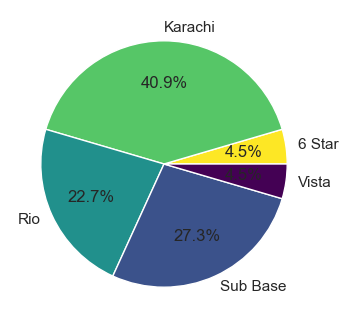

In [37]:
# Team % of Maps Played

# Create figure
fig, ax = plt.subplots(figsize = (8, 4))

# Pie Chart
ax.pie(queried_df["total"], labels = queried_df["map_name"], 
       autopct = '%1.1f%%',  pctdistance = 0.65,
       colors = viridis_gamemode_color_scales["Hardpoint"])

In [77]:
# Filter team summaries by team, map & mode
queried_df = cdlDF[
    (cdlDF['gamemode'] == "Hardpoint") & \
    (cdlDF['team'] == "Los Angeles Thieves")
    ] \
    [['match_id', 'map_name', 'score_diff']].drop_duplicates()

queried_df

,match_id,map_name,score_diff
32,27194,Karachi,-15
204,27202,Karachi,-20
364,27212,Sub Base,-44
512,27219,Karachi,-130
568,27223,Karachi,-36
732,27232,Sub Base,-82
748,27232,Karachi,-74
884,35642,Karachi,-17
1368,27242,Rio,-128
1528,27248,Karachi,35


Text(0.5, 0, 'Map Result')

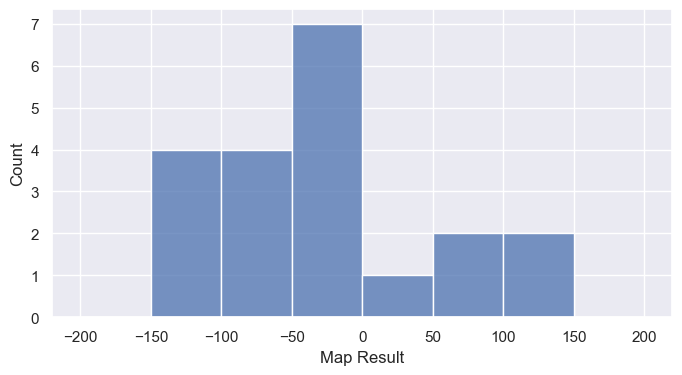

In [78]:
# Team Score Diffs by Map & Mode: Hardpoint

# Create the figure
fig, ax = plt.subplots(figsize = (8, 4))

# Plot the bar chart
sns.histplot(data = queried_df, x = "score_diff", binwidth = 50, 
             binrange = (-200, 200))

# Find count of bin with highest count, then 
# set y-axis to integer values only
queried_df['bin'] = pd.cut(queried_df['score_diff'], bins = range(-200, 201, 50))
max_y = max(queried_df['bin'].value_counts())
y_axis_ticks = range(0, max_y + 1)
plt.yticks(y_axis_ticks)

# Styling
ax.set_xlabel("Map Result")

In [79]:
# Bin Ranges for SnD & Control Score Diffs
gamemode_bin_ranges = {
    "Search & Destroy": (-6, 6), 
    "Control": (-3, 3)
}

In [80]:
# Filter team summaries by team, map & mode
queried_df = cdlDF[
    (cdlDF['gamemode'] == "Search & Destroy") & \
    (cdlDF['team'] == "Toronto Ultra")
    ] \
    [['match_id', 'map_name', 'score_diff']].drop_duplicates()

queried_df

,match_id,map_name,score_diff
116,27198,Highrise,-2
388,27213,Karachi,-3
428,27215,Karachi,6
500,27219,Invasion,-1
636,27227,Karachi,5
1044,35648,Karachi,3
1124,35652,Invasion,5
1180,35654,Karachi,4
1196,27235,Rio,2
1340,27241,Karachi,1


Text(0.5, 0, 'Map Result')

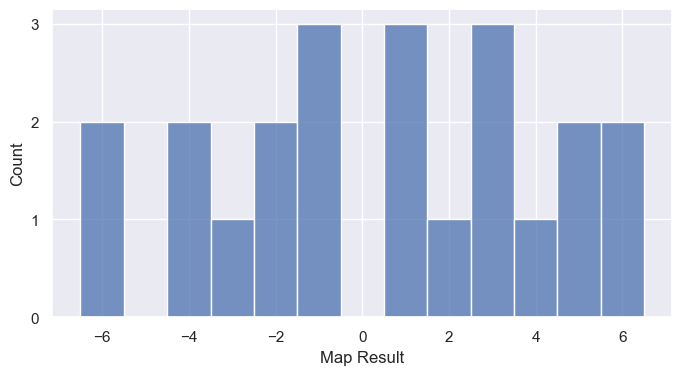

In [81]:
# Team Score Diffs by Map & Mode: SnD & Control

# Create the figure
fig, ax = plt.subplots(figsize = (8, 4))

# Plot the bar chart
sns.histplot(data = queried_df, x = "score_diff", discrete = True,
             binrange = (-6, 6))


# Set y-axis to integer values only
max_y = max(queried_df["score_diff"].value_counts())
y_axis_ticks = range(0, max_y + 1)
plt.yticks(y_axis_ticks)

# Styling
ax.set_xlabel("Map Result")